# Logistic Regression Assignment

### Output variable -> y
### y -> Whether the client has subscribed a term deposit or not 
### Binomial ("yes" or "no")

Attribute information For bank dataset

   Input variables:
   
   # bank client data:
   1 - age (numeric)
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   4 - education (categorical: "unknown","secondary","primary","tertiary")
   5 - default: has credit in default? (binary: "yes","no")
   6 - balance: average yearly balance, in euros (numeric) 
   7 - housing: has housing loan? (binary: "yes","no")
   8 - loan: has personal loan? (binary: "yes","no")
   
   # related with the last contact of the current campaign:
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
  10 - day: last contact day of the month (numeric)
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  12 - duration: last contact duration, in seconds (numeric)
  
   # other attributes:
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means
  client was not previously contacted)
  15 - previous: number of contacts performed before this campaign and for this client (numeric)
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")
  Output variable (desired target):
  17 - y - has the client subscribed a term deposit? (binary: "yes","no")

  8. Missing Attribute Values: None


In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
# Importing the datasets
bank = pd.read_csv('D:/Logistic Regression/bank-full.csv', sep=";")

In [3]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

# EDA

In [7]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

### There is no null values in data.

In [8]:
bank[bank.duplicated()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


In [9]:
bank.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


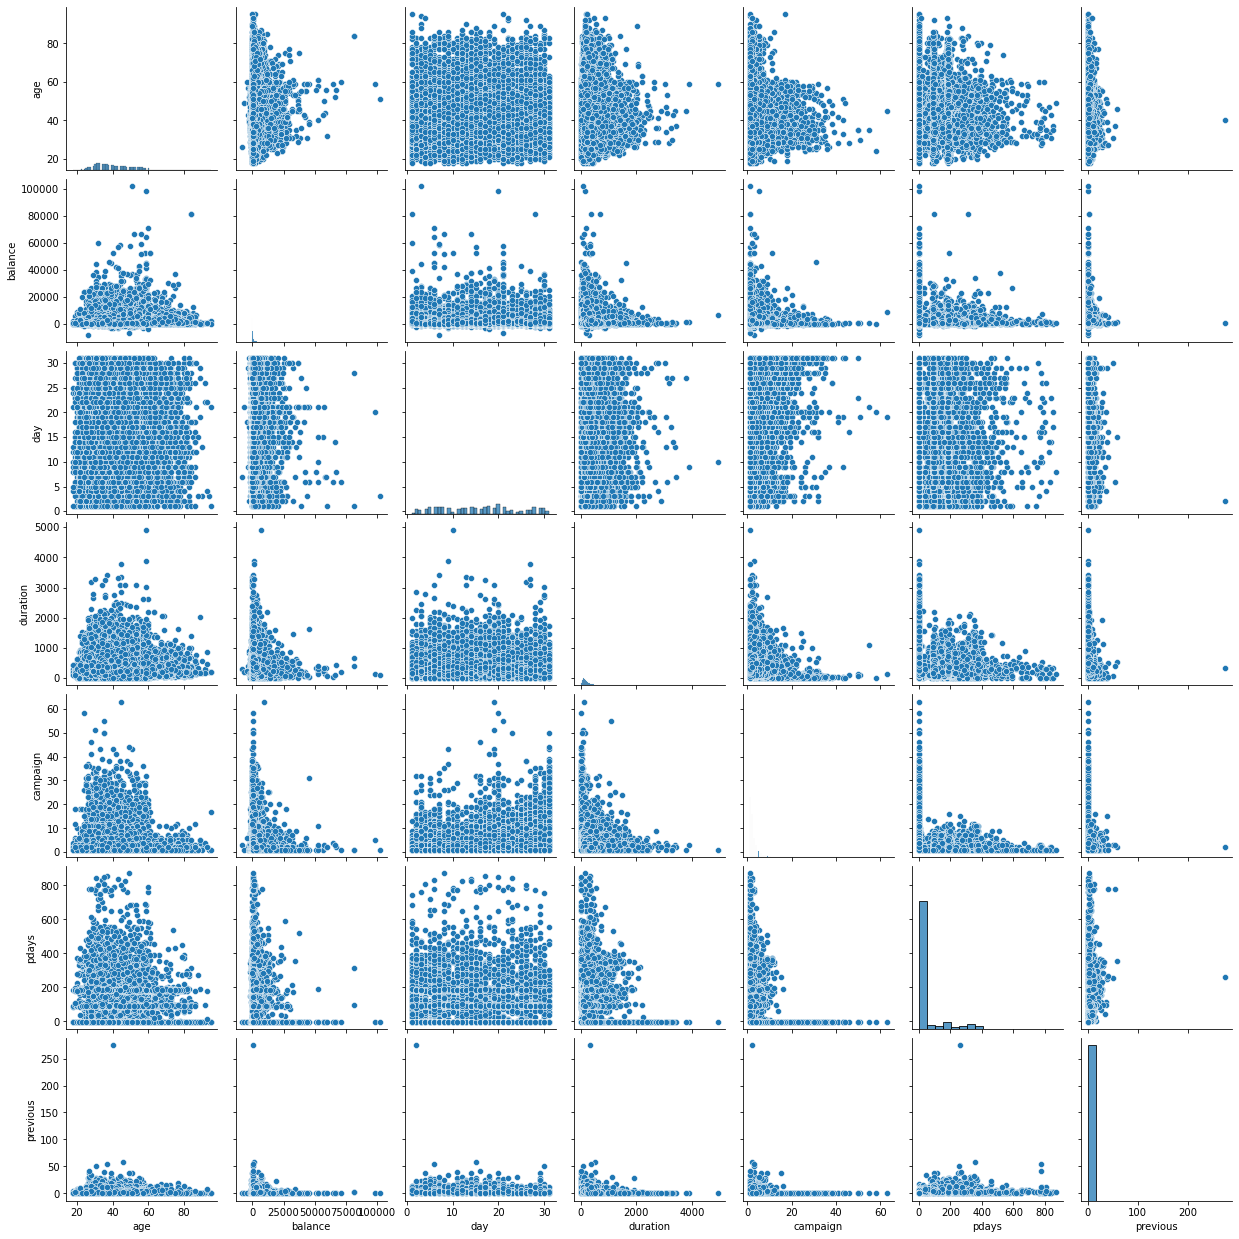

In [10]:
sns.pairplot(bank)
plt.show()

<AxesSubplot:>

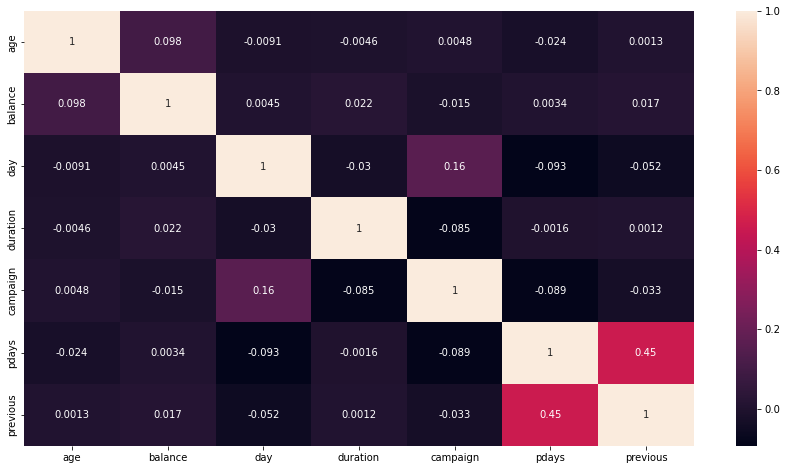

In [11]:
fig = plt.figure(figsize=(15,8))
sns.heatmap(bank.corr(), annot=True)

### Here, In the above plot we can't see any clear relation among age,balance, duuration, campaign.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\si

<AxesSubplot:xlabel='campaign', ylabel='count'>

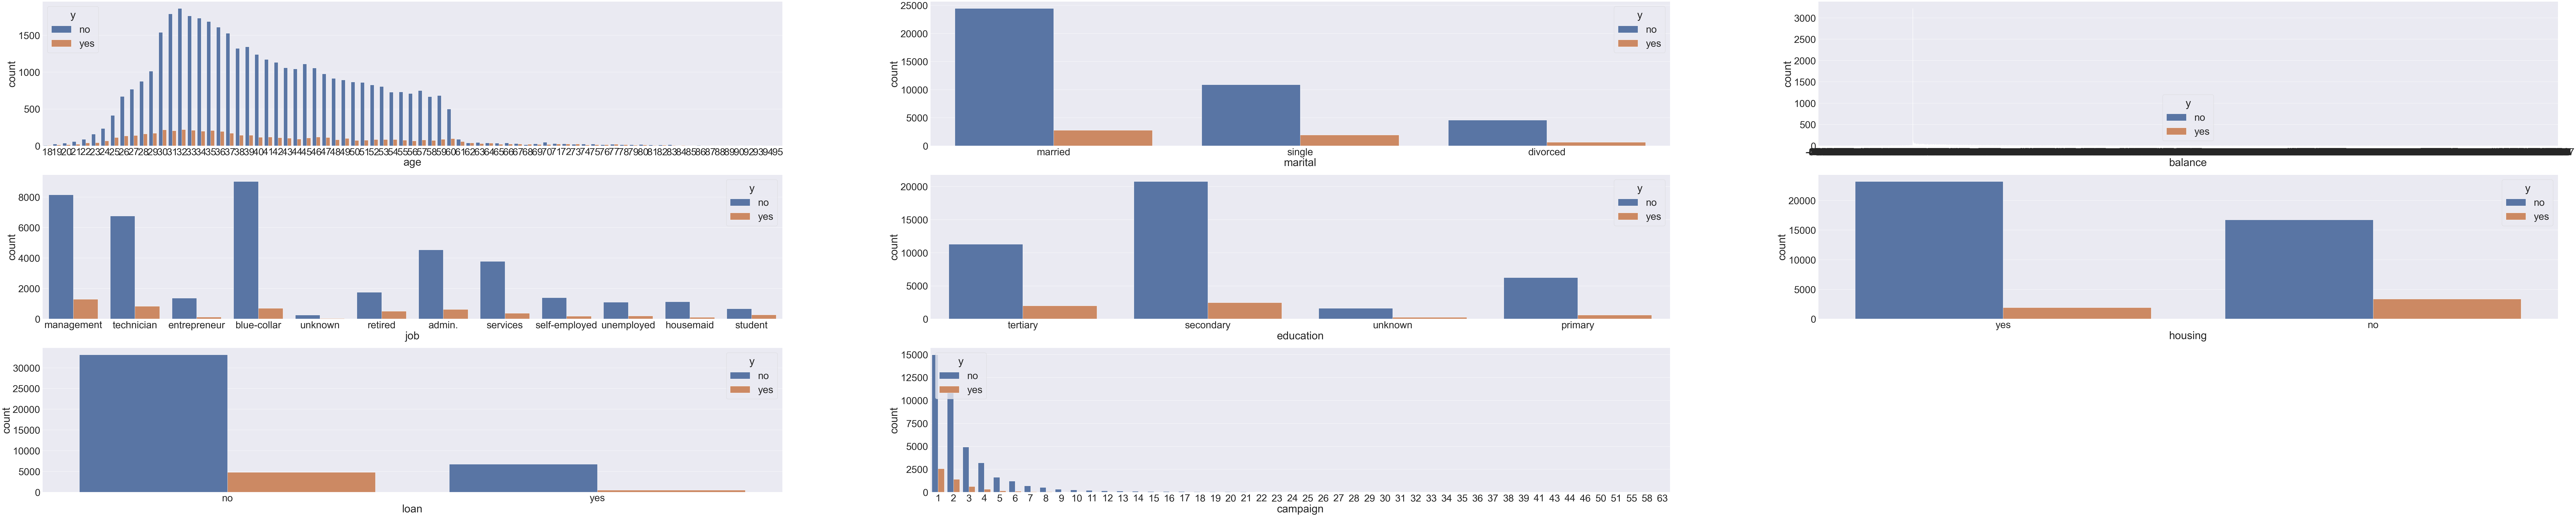

In [12]:
plt.figure(figsize=(200,40))
sns.set(font_scale = 4)


plt.subplot(331)
sns.countplot(bank['age'],hue=bank['y'])

plt.subplot(332)
sns.countplot(bank['marital'],hue=bank['y'])

plt.subplot(333)
sns.countplot(bank['balance'],hue=bank['y'])

plt.subplot(334)
sns.countplot(bank['job'],hue=bank['y'])

plt.subplot(335)
sns.countplot(bank['education'],hue=bank['y'])

plt.subplot(336)
sns.countplot(bank['housing'],hue=bank['y'])

plt.subplot(337)
sns.countplot(bank['loan'],hue=bank['y'])

plt.subplot(338)
sns.countplot(bank['campaign'],hue=bank['y'])

 ### Here is the camparison between Parameters who have subscribed and not.

## Let's replace Variable values to Numerical form & display value counts



### The data in numerical form avoids disturbance in building model

In [13]:
bank['y'].replace('yes',1,inplace=True)
bank['y'].replace('no',0,inplace=True)
bank['y'].value_counts()

0    39922
1     5289
Name: y, dtype: int64

In [14]:
bank.marital = bank.marital.map({'married':1, 'single':0, 'divorced':2})
bank['marital'].value_counts()

1    27214
0    12790
2     5207
Name: marital, dtype: int64

In [15]:
bank.education =bank.education.map({'unknown':0, 'primary':1, 'secondary':2, 'tertiary':3})
bank['education'].value_counts()

2    23202
3    13301
1     6851
0     1857
Name: education, dtype: int64

In [16]:
bank.default = bank.default.map({'yes':1, 'no':0})
bank['default'].value_counts()

0    44396
1      815
Name: default, dtype: int64

In [17]:
bank.housing = bank.housing.map({'yes':1, 'no':0})
bank['housing'].value_counts()

1    25130
0    20081
Name: housing, dtype: int64

In [18]:
bank.contact = bank.contact.map({'cellular':1, 'telephone':2, 'unknown':0})
bank['contact'].value_counts()

1    29285
0    13020
2     2906
Name: contact, dtype: int64

In [19]:
bank.loan = bank.loan.map({'yes':1, 'no':0})
bank['loan'].value_counts()

0    37967
1     7244
Name: loan, dtype: int64

In [20]:
bank['age'].value_counts()

32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: age, Length: 77, dtype: int64

In [21]:
bank['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

# OneHotEncoder for dummy Variable encoding to remove categorical Data

In [22]:
bank_1 = pd.get_dummies(bank,columns=['job','month','poutcome'])
pd.set_option("display.max.columns", None)
bank_1

,age,marital,education,default,balance,housing,loan,contact,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,1,3,0,2143,1,0,0,5,261,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,44,0,2,0,29,1,0,0,5,151,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,33,1,2,0,2,1,1,0,5,76,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,47,1,0,0,1506,1,0,0,5,92,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,33,0,0,0,1,0,0,0,5,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,1,3,0,825,0,0,1,17,977,3,-1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
45207,71,2,1,0,1729,0,0,1,17,456,2,-1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
45208,72,1,2,0,5715,0,0,1,17,1127,5,184,3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
45209,57,1,2,0,668,0,0,2,17,508,4,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [23]:
bank_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                45211 non-null  int64
 1   marital            45211 non-null  int64
 2   education          45211 non-null  int64
 3   default            45211 non-null  int64
 4   balance            45211 non-null  int64
 5   housing            45211 non-null  int64
 6   loan               45211 non-null  int64
 7   contact            45211 non-null  int64
 8   day                45211 non-null  int64
 9   duration           45211 non-null  int64
 10  campaign           45211 non-null  int64
 11  pdays              45211 non-null  int64
 12  previous           45211 non-null  int64
 13  y                  45211 non-null  int64
 14  job_admin.         45211 non-null  uint8
 15  job_blue-collar    45211 non-null  uint8
 16  job_entrepreneur   45211 non-null  uint8
 17  job_housemai

# Model Building

In [24]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

In [25]:
x=pd.concat([bank_1.iloc[:,0:13],bank_1.iloc[:,14:]],axis=1)
y=bank_1.iloc[:,13]
classifier=LogisticRegression()
classifier.fit(x,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Data Exploration

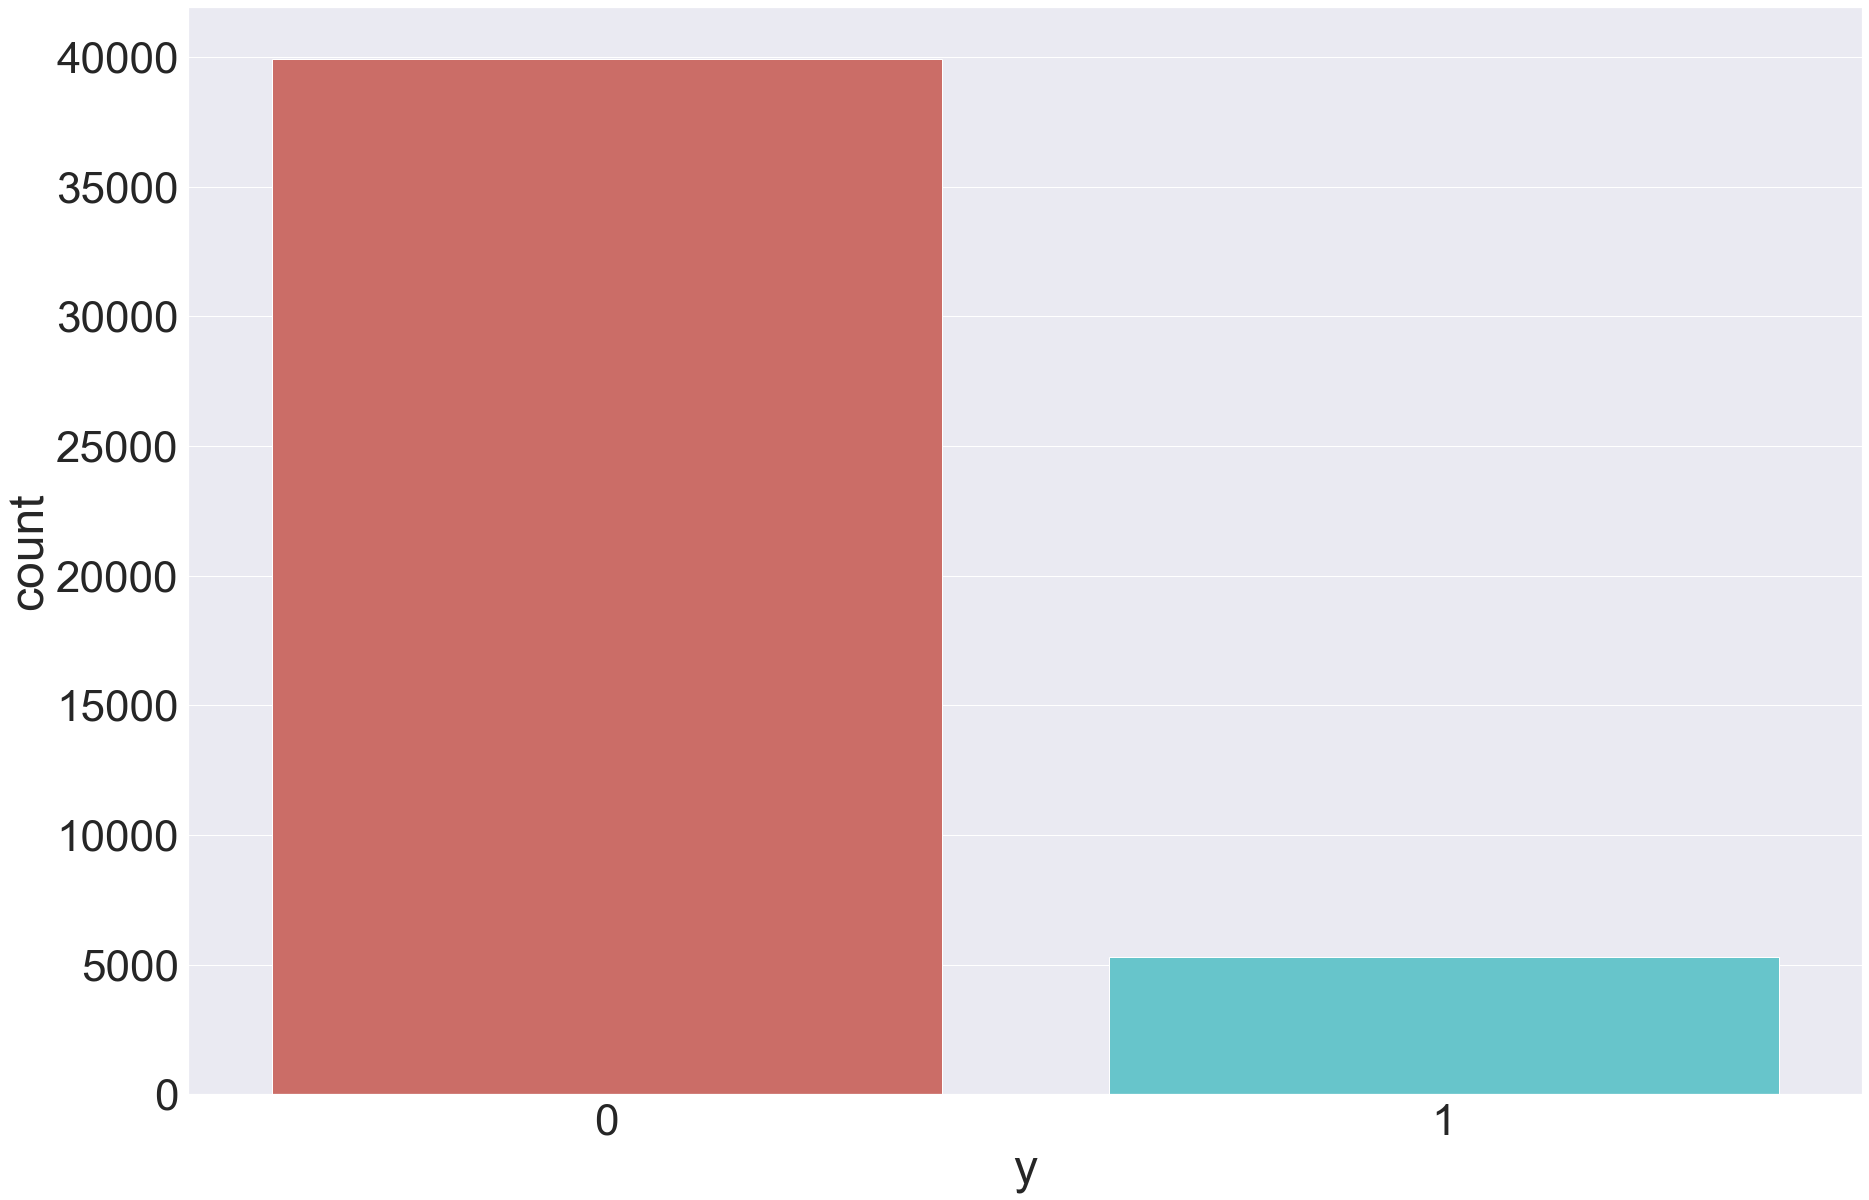

In [26]:
bank['y'].value_counts()

fig = plt.figure(figsize=(30,20))

sns.countplot(x='y', data=bank, palette='hls')
plt.show()

In [27]:
y_pred = classifier.predict(x)
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

# Confusion matrix

In [28]:
confusion_matrix = confusion_matrix(y,y_pred)
confusion_matrix

array([[39192,   730],
       [ 4166,  1123]], dtype=int64)

# Test Model Accuracy

In [29]:
[((39081+1248)/(39081+841+4041+1248))]  ### [(a+b)/(a+b+c+d)]

[0.8920174293866537]

## Here accuracy is 0.89 which is greater than 0.5

### Therefore , Threshold value > 0.5 = 1 ; So we can client has subcribed .
### Threshold value < 0.5 = 0 ; which means client has not subcribed 

In [30]:
classifier.predict_proba(x)[:,1] 


array([0.03086988, 0.03458899, 0.02149252, ..., 0.76332252, 0.1367826 ,
       0.24375846])

## Plotting ROC Curve (Receiver operating characteristic)

### TPR(True Positive Rate) & FPR (False Positive Rate)

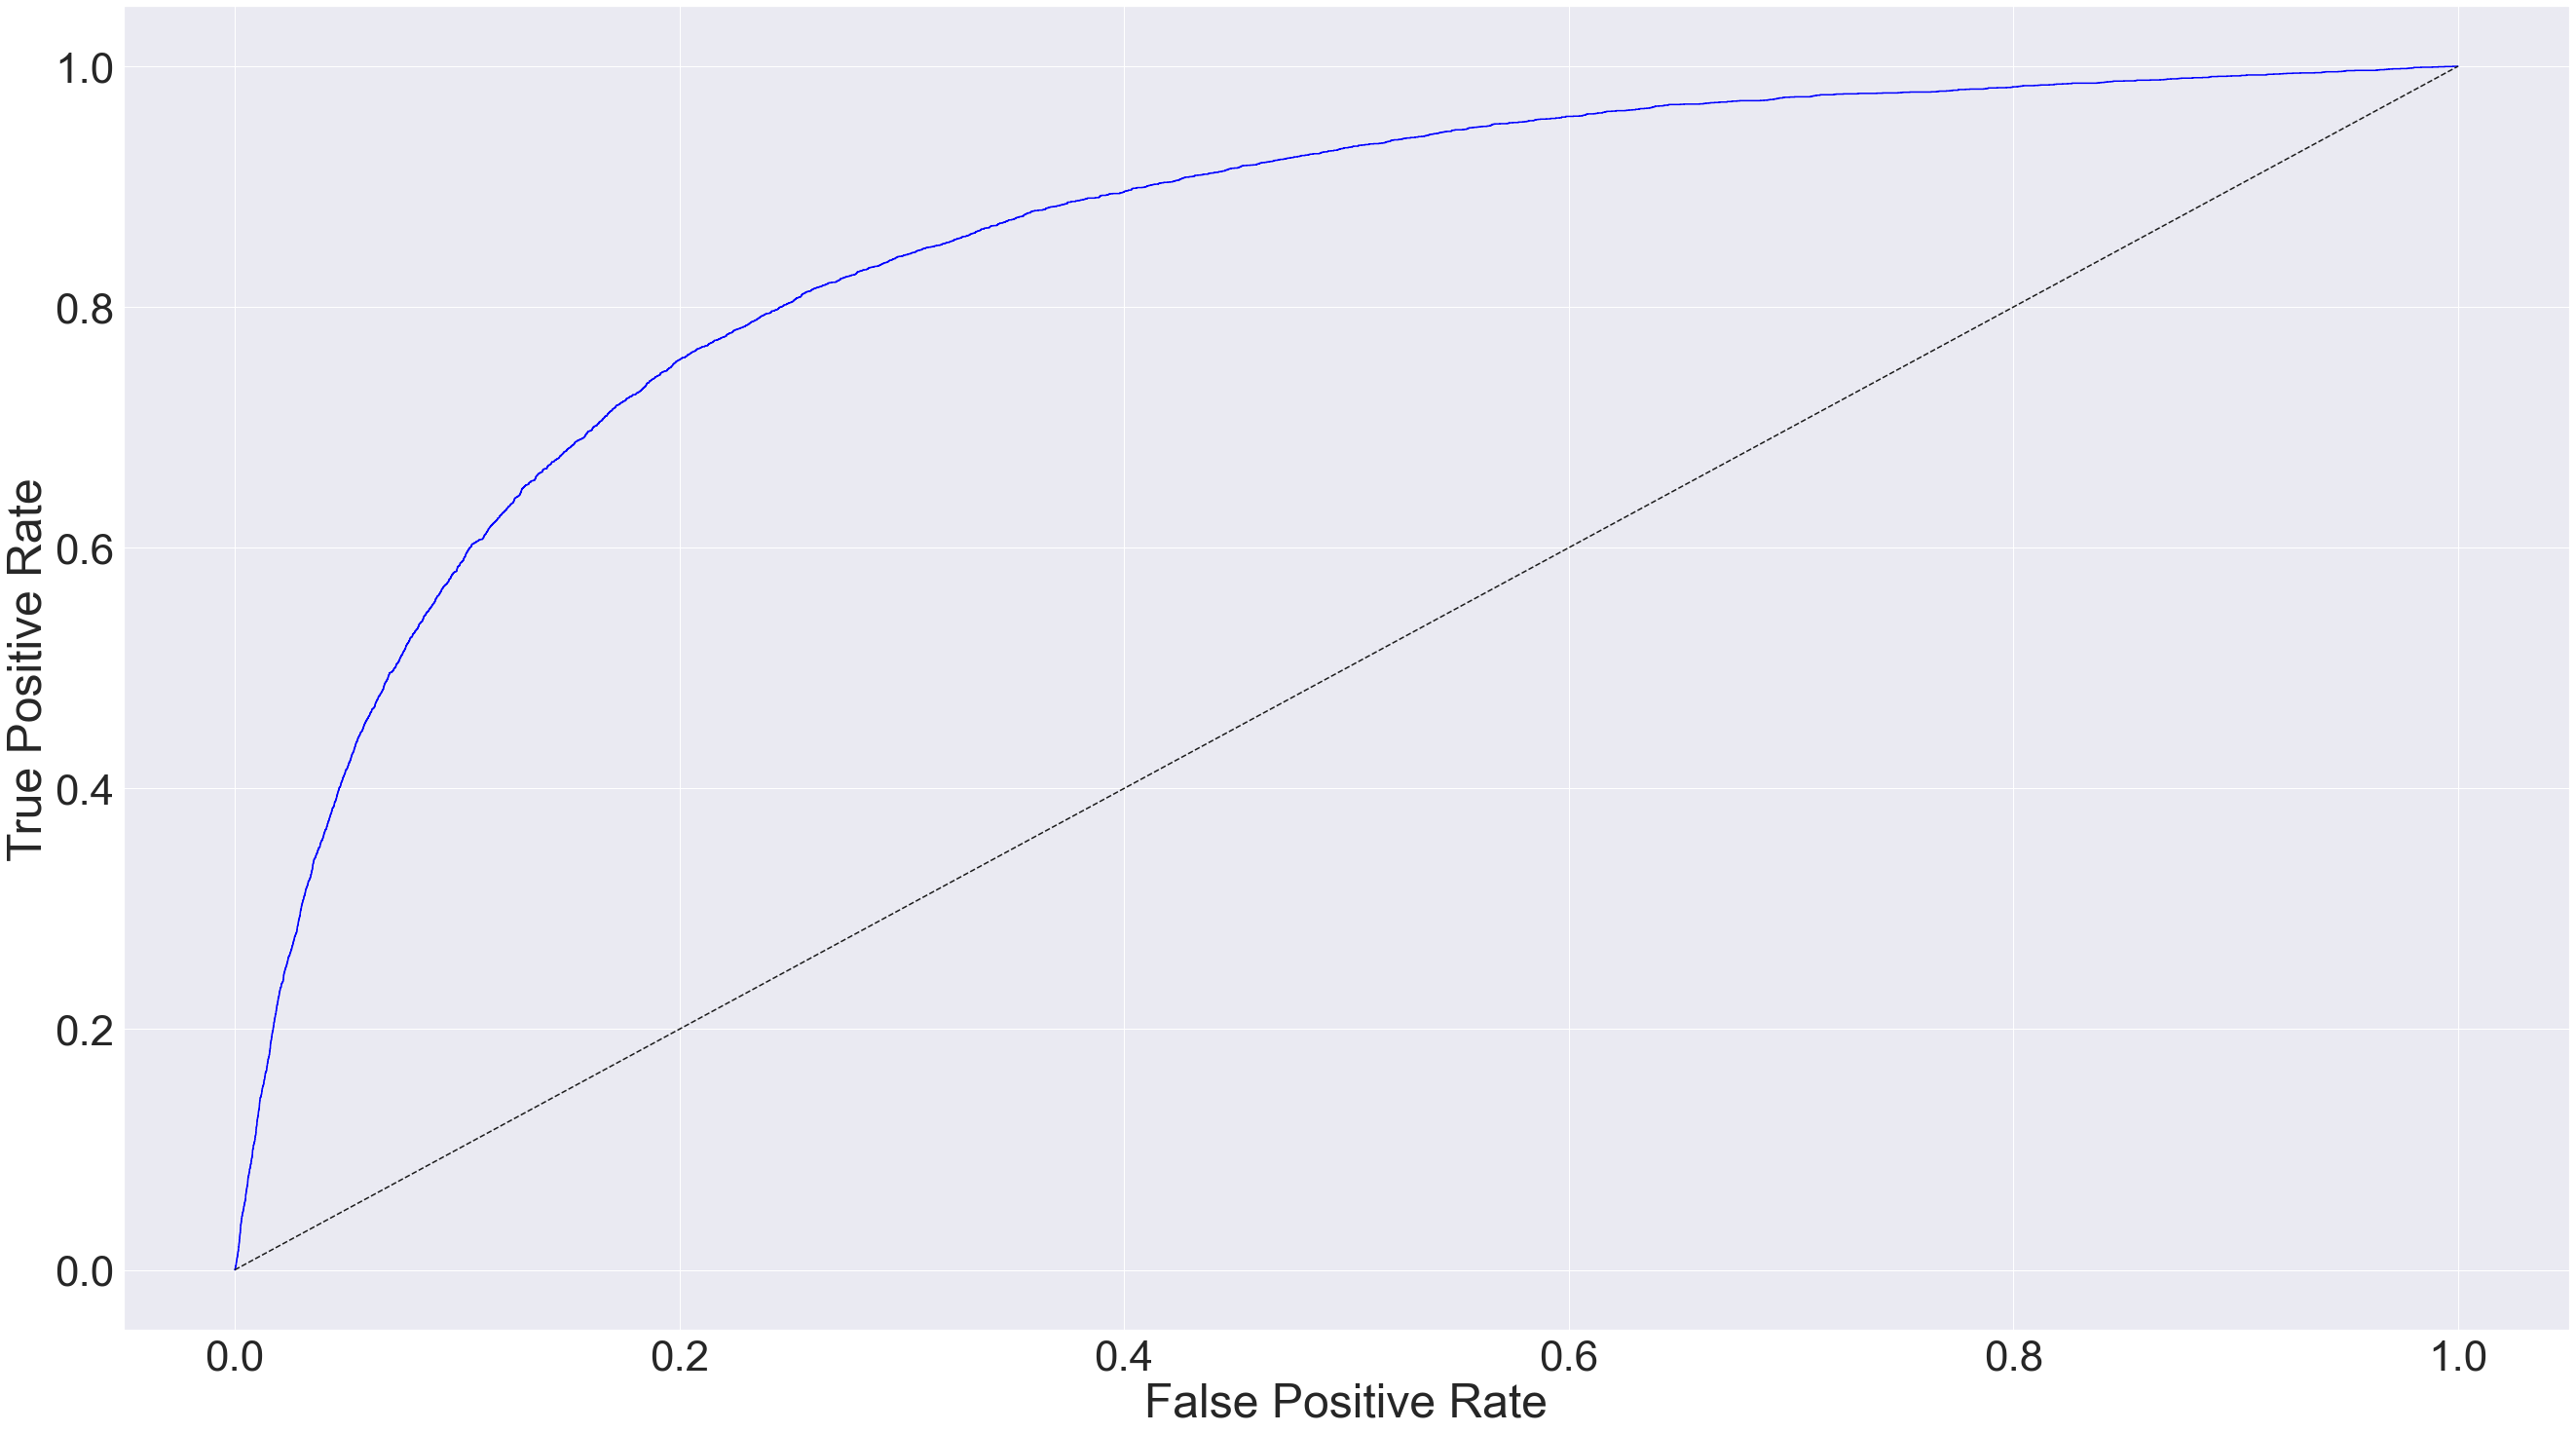

In [31]:
fpr,tpr,threshold=roc_curve(y,classifier.predict_proba(x)[:,1])
auc=roc_auc_score(y,y_pred)
fig=plt.figure(figsize=(45,25))
plt.plot(fpr,tpr,color='blue')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

## AUC Value

In [32]:
print('auc accuracy:',[auc])


auc accuracy: [0.5970209075403597]


In [33]:
count_no_sub = len(bank_1[bank_1['y']==0])
count_sub = len(bank_1[bank_1['y']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of client who HAD NOT subscriped", [pct_of_no_sub*100])
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of client who HAD subscriped", [pct_of_sub*100])

percentage of client who HAD NOT subscriped [88.30151954170445]
percentage of client who HAD subscriped [11.698480458295547]
